In [25]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os # Usaremos os.path.join para construir rutas de forma segura

# Esta es la carpeta base que ya definiste
data_sets_base = 'datasets_sonora/datasets_sonora/datasets_sonora_csv'

# 1. Construye la ruta a la carpeta específica de Nacimientos 📂
# Usamos os.path.join para que funcione en cualquier sistema operativo.
ruta_nacimientos = os.path.join(data_sets_base, 'Nacimientos')

# 2. Crea una lista con las rutas completas de los archivos que quieres cargar (2018-2024)
archivos_a_cargar = []
for anio in range(2018, 2025): # El rango va de 2018 hasta 2024
    # Formato del nombre de archivo: 'Nacimientos 2018.csv'
    nombre_archivo = f'Nacimientos {anio}.csv'
    ruta_completa = os.path.join(ruta_nacimientos, nombre_archivo)
    archivos_a_cargar.append(ruta_completa)

# Opcional: Imprime las rutas para verificar que son correctas
print("Se intentarán cargar los siguientes archivos:")
print(archivos_a_cargar)

# 3. Carga y concatena todos los archivos en un único DataFrame ✨
# Usamos una "list comprehension" para leer cada CSV y luego pd.concat los une.
# Se añade un bloque try-except para manejar el caso de que un archivo no exista.
lista_de_dfs = []
for archivo in archivos_a_cargar:
    try:
        df_temporal = pd.read_csv(archivo, encoding='latin1')
        lista_de_dfs.append(df_temporal)
    except FileNotFoundError:
        print(f"ADVERTENCIA: El archivo {archivo} no fue encontrado y será omitido.")

# Solo si se encontró al menos un archivo, se procede a concatenar
if lista_de_dfs:
    df_nacimientos = pd.concat(lista_de_dfs, ignore_index=True)

    # 4. Verifica que todo se haya cargado correctamente
    print("\n¡Carga completada!")
    print("Información del DataFrame combinado:")
    df_nacimientos.info()

    print("\nPrimeras 5 filas:")
    print(df_nacimientos.head())

    print("\nÚltimas 5 filas (para verificar que se cargaron todos los años):")
    print(df_nacimientos.tail())
else:
    print("\nNo se pudo cargar ningún archivo. Verifica las rutas y los nombres de los archivos.")

Se intentarán cargar los siguientes archivos:
['datasets_sonora/datasets_sonora/datasets_sonora_csv/Nacimientos/Nacimientos 2018.csv', 'datasets_sonora/datasets_sonora/datasets_sonora_csv/Nacimientos/Nacimientos 2019.csv', 'datasets_sonora/datasets_sonora/datasets_sonora_csv/Nacimientos/Nacimientos 2020.csv', 'datasets_sonora/datasets_sonora/datasets_sonora_csv/Nacimientos/Nacimientos 2021.csv', 'datasets_sonora/datasets_sonora/datasets_sonora_csv/Nacimientos/Nacimientos 2022.csv', 'datasets_sonora/datasets_sonora/datasets_sonora_csv/Nacimientos/Nacimientos 2023.csv', 'datasets_sonora/datasets_sonora/datasets_sonora_csv/Nacimientos/Nacimientos 2024.csv']

¡Carga completada!
Información del DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ï»¿municipio  3471 non-null   float64
 1   aÃ±o          3471 non-null   float64
 2

In [26]:
# Celda 2 MEJORADA - Recuperando todos los datos:

print("Columnas disponibles:")
print(df_nacimientos.columns.tolist())
print("\n" + "="*60)

# Identificamos TODAS las columnas de año (incluyendo a\x96o)
columnas_anio = [col for col in df_nacimientos.columns 
                 if col not in ['mes', 'total', 'hombres', 'mujeres', 'municipio', 'ï»¿municipio']]

print(f"Columnas de año identificadas: {columnas_anio}")

# Identificamos columnas de municipio
columnas_municipio = [col for col in df_nacimientos.columns if 'munic' in col.lower()]
print(f"Columnas de municipio identificadas: {columnas_municipio}")

# Unificamos municipio (2 columnas)
df_nacimientos['municipio_unificado'] = df_nacimientos[columnas_municipio[0]].fillna(df_nacimientos[columnas_municipio[1]])

# Unificamos año (ahora con AMBAS columnas: 'aÃ±o' y 'a\x96o')
if len(columnas_anio) == 2:
    df_nacimientos['año_unificado'] = df_nacimientos[columnas_anio[0]].fillna(df_nacimientos[columnas_anio[1]])
    print(f"\n✓ Combinando columnas: '{columnas_anio[0]}' + '{columnas_anio[1]}'")
else:
    df_nacimientos['año_unificado'] = df_nacimientos[columnas_anio[0]]

# Verificamos valores nulos
nulos_municipio = df_nacimientos['municipio_unificado'].isna().sum()
nulos_anio = df_nacimientos['año_unificado'].isna().sum()

print(f"\nValores nulos después de unificar:")
print(f"  municipio_unificado: {nulos_municipio}")
print(f"  año_unificado: {nulos_anio}")

# Eliminamos solo si hay nulos reales
if nulos_municipio > 0 or nulos_anio > 0:
    df_nacimientos_limpio = df_nacimientos.dropna(subset=['municipio_unificado', 'año_unificado'])
    print(f"\n⚠️  Se eliminaron {len(df_nacimientos) - len(df_nacimientos_limpio)} filas con valores nulos")
else:
    df_nacimientos_limpio = df_nacimientos.copy()
    print("\n✓ No se encontraron valores nulos - todos los datos conservados")

print(f"Filas: {len(df_nacimientos)} → {len(df_nacimientos_limpio)}")

# Creamos el DataFrame limpio
df_limpio = df_nacimientos_limpio[['municipio_unificado', 'año_unificado', 'mes', 'hombres', 'mujeres', 'total']].copy()
df_limpio.columns = ['municipio', 'año', 'mes', 'hombres', 'mujeres', 'total']

# Convertimos a enteros
df_limpio['municipio'] = df_limpio['municipio'].astype(int)
df_limpio['año'] = df_limpio['año'].astype(int)

# Resultado final
print("\n" + "="*60)
print("✅ LIMPIEZA COMPLETADA - DATOS COMPLETOS")
print("="*60)
df_limpio.info()
print("\n📋 Primeras 10 filas:")
print(df_limpio.head(10))
print("\n📋 Últimas 10 filas:")
print(df_limpio.tail(10))
print(f"\n📊 RESUMEN COMPLETO:")
print(f"   • Años: {sorted(df_limpio['año'].unique())}")
print(f"   • Municipios únicos: {df_limpio['municipio'].nunique()}")
print(f"   • Total registros: {len(df_limpio):,}")
print(f"   • Registros por año:")
for anio in sorted(df_limpio['año'].unique()):
    count = len(df_limpio[df_limpio['año'] == anio])
    print(f"     - {anio}: {count:,} registros")

Columnas disponibles:
['ï»¿municipio', 'aÃ±o', 'mes', 'hombres', 'mujeres', 'total', 'municipio', 'a\x96o']

Columnas de año identificadas: ['aÃ±o', 'a\x96o']
Columnas de municipio identificadas: ['ï»¿municipio', 'municipio']

✓ Combinando columnas: 'aÃ±o' + 'ao'

Valores nulos después de unificar:
  municipio_unificado: 0
  año_unificado: 0

✓ No se encontraron valores nulos - todos los datos conservados
Filas: 4746 → 4746

✅ LIMPIEZA COMPLETADA - DATOS COMPLETOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   municipio  4746 non-null   int64
 1   año        4746 non-null   int64
 2   mes        4746 non-null   int64
 3   hombres    4746 non-null   int64
 4   mujeres    4746 non-null   int64
 5   total      4746 non-null   int64
dtypes: int64(6)
memory usage: 222.6 KB

📋 Primeras 10 filas:
   municipio   año  mes  hombres  mujeres  total
0        

In [27]:
# Celda 3: Preparación de datos para el mapa de calor

# Calculemos el total de nacimientos por municipio (2018-2024)
nacimientos_por_municipio = df_limpio.groupby('municipio')['total'].sum().reset_index()
nacimientos_por_municipio.columns = ['municipio', 'nacimientos_totales']
nacimientos_por_municipio = nacimientos_por_municipio.sort_values('nacimientos_totales', ascending=False)

print("📊 Top 10 municipios con más nacimientos (2018-2024):")
print(nacimientos_por_municipio.head(10))

print("\n📊 Top 10 municipios con menos nacimientos (2018-2024):")
print(nacimientos_por_municipio.tail(10))

print(f"\n📈 Estadísticas generales:")
print(f"   Total de nacimientos en Sonora: {nacimientos_por_municipio['nacimientos_totales'].sum():,}")
print(f"   Promedio por municipio: {nacimientos_por_municipio['nacimientos_totales'].mean():.0f}")
print(f"   Municipio con más nacimientos: {nacimientos_por_municipio.iloc[0]['nacimientos_totales']:,}")
print(f"   Municipio con menos nacimientos: {nacimientos_por_municipio.iloc[-1]['nacimientos_totales']:,}")

# Guardamos los datos preparados
print("\n✅ Datos preparados para el mapa")

📊 Top 10 municipios con más nacimientos (2018-2024):
    municipio  nacimientos_totales
28         30                73136
16         18                34979
41         43                22149
52         55                17634
40         42                16306
27         29                13258
31         33                 7018
15         17                 6111
1           2                 5912
46         48                 5599

📊 Top 10 municipios con menos nacimientos (2018-2024):
    municipio  nacimientos_totales
62         65                   68
26         28                   58
64         67                   55
30         32                   53
22         24                   51
6           8                   35
57         60                   31
42         44                   29
7           9                   24
51         53                    2

📈 Estadísticas generales:
   Total de nacimientos en Sonora: 246,748
   Promedio por municipio: 3525
   Municipio con má

In [28]:
# Celda 4: Preparar datos para el mapa interactivo

# Obtener el total de nacimientos por municipio y por año
datos_municipios = {}

for municipio in df_limpio['municipio'].unique():
    df_muni = df_limpio[df_limpio['municipio'] == municipio]
    
    # Necesitaremos mapear códigos de municipio a nombres
    # Por ahora usamos el código, pero puedes agregar un diccionario de nombres
    datos_municipios[int(municipio)] = {
        'total': int(df_muni['total'].sum()),
        2018: int(df_muni[df_muni['año'] == 2018]['total'].sum()),
        2019: int(df_muni[df_muni['año'] == 2019]['total'].sum()),
        2020: int(df_muni[df_muni['año'] == 2020]['total'].sum()),
        2021: int(df_muni[df_muni['año'] == 2021]['total'].sum()),
        2022: int(df_muni[df_muni['año'] == 2022]['total'].sum()),
        2023: int(df_muni[df_muni['año'] == 2023]['total'].sum()),
        2024: int(df_muni[df_muni['año'] == 2024]['total'].sum())
    }

# Mostrar los primeros municipios
print("📊 Datos preparados para el mapa interactivo:")
print("\nTop 10 municipios por total de nacimientos:")
top_10 = sorted(datos_municipios.items(), key=lambda x: x[1]['total'], reverse=True)[:10]
for codigo, datos in top_10:
    print(f"Municipio {codigo}: {datos['total']:,} nacimientos totales")

print(f"\n✅ Total de municipios: {len(datos_municipios)}")
print(f"✅ Total de nacimientos en Sonora (2018-2024): {sum(d['total'] for d in datos_municipios.values()):,}")

# Exportar como JSON para visualización
import json
datos_json = json.dumps(datos_municipios, indent=2)
print("\n📄 Datos en formato JSON (copiar estos datos al componente React):")
print(datos_json[:500] + "...")

📊 Datos preparados para el mapa interactivo:

Top 10 municipios por total de nacimientos:
Municipio 30: 73,136 nacimientos totales
Municipio 18: 34,979 nacimientos totales
Municipio 43: 22,149 nacimientos totales
Municipio 55: 17,634 nacimientos totales
Municipio 42: 16,306 nacimientos totales
Municipio 29: 13,258 nacimientos totales
Municipio 33: 7,018 nacimientos totales
Municipio 17: 6,111 nacimientos totales
Municipio 2: 5,912 nacimientos totales
Municipio 48: 5,599 nacimientos totales

✅ Total de municipios: 70
✅ Total de nacimientos en Sonora (2018-2024): 246,748

📄 Datos en formato JSON (copiar estos datos al componente React):
{
  "1": {
    "total": 158,
    "2018": 23,
    "2019": 18,
    "2020": 32,
    "2021": 33,
    "2022": 21,
    "2023": 15,
    "2024": 16
  },
  "2": {
    "total": 5912,
    "2018": 1333,
    "2019": 1215,
    "2020": 1054,
    "2021": 823,
    "2022": 546,
    "2023": 464,
    "2024": 477
  },
  "3": {
    "total": 1935,
    "2018": 297,
    "2019": 2

In [29]:
#!pip install geopandas

In [30]:
import geopandas as gpd

# Ruta al archivo. Si está en la misma carpeta, solo necesitas el nombre.
ruta_del_json = 'sonora.json'

try:
    # Leemos el archivo y lo cargamos en un GeoDataFrame
    gdf_sonora = gpd.read_file(ruta_del_json)
    
    # Verificamos que se haya cargado correctamente
    print("✅ ¡Archivo JSON cargado exitosamente en un GeoDataFrame!")
    print("\nInformación del GeoDataFrame:")
    gdf_sonora.info()
    
    print("\nPrimeras 5 filas:")
    print(gdf_sonora.head())

except Exception as e:
    print(f"❌ Ocurrió un error al leer el archivo: {e}")
    print("\nPor favor, verifica que 'sonora.json' esté en la misma carpeta que tu notebook.")

✅ ¡Archivo JSON cargado exitosamente en un GeoDataFrame!

Información del GeoDataFrame:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CVEGEO     72 non-null     object  
 1   CVE_ENT    72 non-null     object  
 2   CVE_MUN    72 non-null     object  
 3   NOMGEO     72 non-null     object  
 4   NOM_ENT    72 non-null     object  
 5   COV_       72 non-null     int32   
 6   COV_ID     72 non-null     int32   
 7   AREA       72 non-null     float64 
 8   PERIMETER  72 non-null     float64 
 9   geometry   72 non-null     geometry
dtypes: float64(2), geometry(1), int32(2), object(5)
memory usage: 5.2+ KB

Primeras 5 filas:
  CVEGEO CVE_ENT CVE_MUN      NOMGEO NOM_ENT  COV_  COV_ID           AREA  \
0  26003      26     003     Ãlamos  Sonora  1907    1904  637709.984480   
1  26045      26     045     Opodepe  Sonora  1908    1912  2

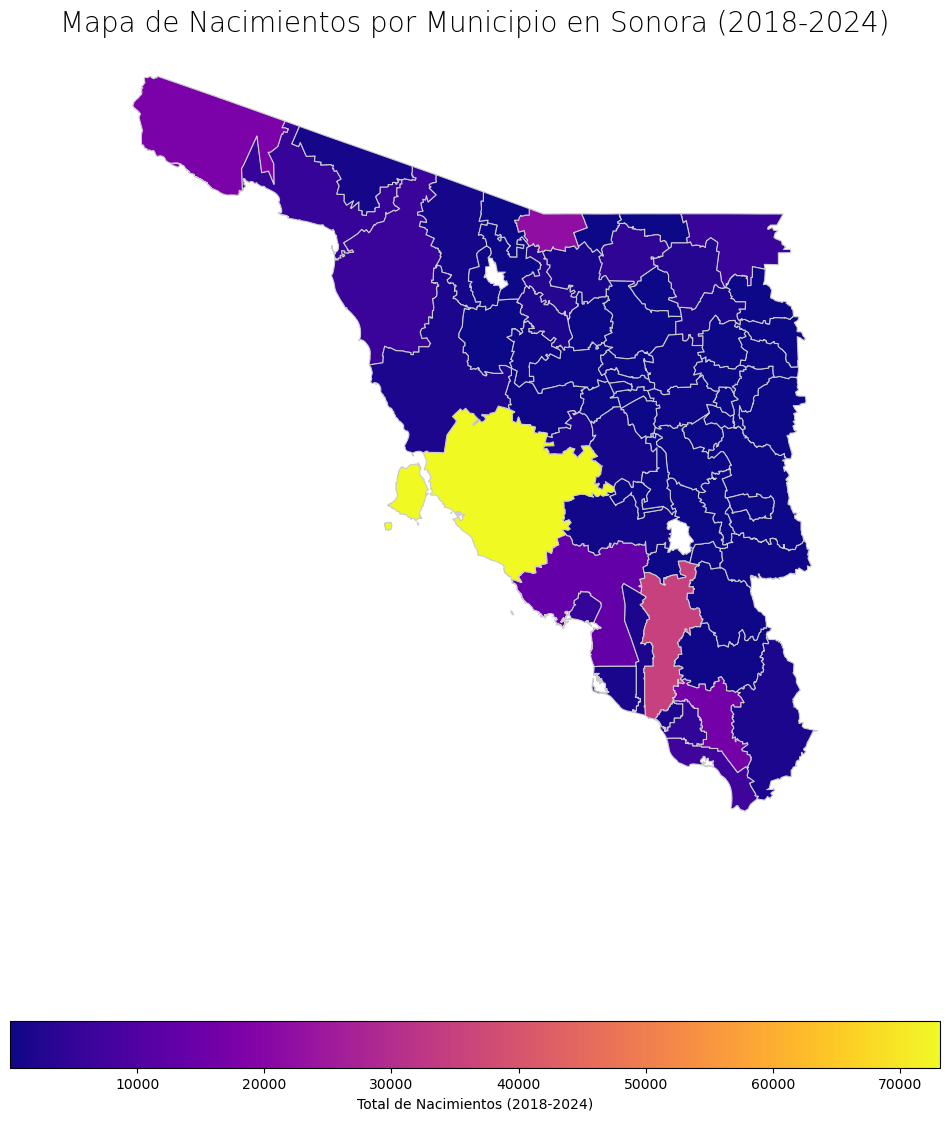

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepara tus datos de nacimientos (df_limpio)
# Agrupamos para tener un solo valor (total de nacimientos) por municipio.
nacimientos_por_municipio = df_limpio.groupby('municipio')['total'].sum().reset_index()

# 2. Crea la clave de unión en tu DataFrame de nacimientos
# Convertimos el ID numérico (ej: 3) a texto con ceros a la izquierda (ej: '003')
nacimientos_por_municipio['CVE_MUN'] = nacimientos_por_municipio['municipio'].astype(str).str.zfill(3)
# Creamos la clave completa (ej: '26' + '003' -> '26003')
nacimientos_por_municipio['CVEGEO'] = '26' + nacimientos_por_municipio['CVE_MUN']


# 3. Une los datos geográficos con tus datos de nacimientos
# Usamos .merge() para unir gdf_sonora con nacimientos_por_municipio
# donde los valores de la columna 'CVEGEO' coincidan.
mapa_df = gdf_sonora.merge(nacimientos_por_municipio, on='CVEGEO')


# 4. ¡Crea el mapa de calor (coroplético)!
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

mapa_df.plot(column='total', # La columna con los datos a colorear
             ax=ax,
             legend=True,
             cmap='plasma', # Esquema de color
             linewidth=0.8,
             edgecolor='0.8',
             legend_kwds={'label': "Total de Nacimientos (2018-2024)",
                          'orientation': "horizontal",
                          'shrink': 0.6})

# Añade títulos y quita los ejes para un look más limpio
ax.set_title('Mapa de Nacimientos por Municipio en Sonora (2018-2024)', fontdict={'fontsize': '20', 'fontweight': '3'})
ax.set_axis_off()

# Muestra el mapa
plt.show()

# Opcional: Guarda el mapa en un archivo
fig.savefig('mapa_nacimientos_sonora.png', dpi=300, bbox_inches='tight')

In [32]:
#!pip install folium

In [33]:
import folium

# 1. Asegúrate de tener tus datos limpios (df_limpio) y geográficos (gdf_sonora)
# gdf_sonora debe haber sido cargado desde tu archivo 'sonora.json'

# Ubicación central para el mapa
centro_sonora = [29.8, -110.9]

# Años que quieres visualizar
años = sorted(df_limpio['año'].unique())

for anio in años:
    # Creamos un mapa base para este año
    mapa_anual = folium.Map(location=centro_sonora, zoom_start=7, tiles="CartoDB positron")

    # Filtramos los datos de nacimientos para el año actual
    df_anio_actual = df_limpio[df_limpio['año'] == anio]
    
    # Preparamos los datos para unirlos con el mapa
    nacimientos_anual = df_anio_actual.groupby('municipio')['total'].sum().reset_index()
    nacimientos_anual['CVE_MUN'] = nacimientos_anual['municipio'].astype(str).str.zfill(3)
    nacimientos_anual['CVEGEO'] = '26' + nacimientos_anual['CVE_MUN']
    
    # Creamos la capa de coropletas (el mapa de calor)
    folium.Choropleth(
        geo_data=gdf_sonora,
        name=f'Nacimientos en {anio}',
        data=nacimientos_anual,
        columns=['CVEGEO', 'total'], # Columna clave y columna de valores
        key_on='feature.properties.CVEGEO', # Ruta a la clave en el archivo GeoJSON
        fill_color='YlOrRd', # Paleta de Amarillo a Rojo
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Total de Nacimientos en {anio}'
    ).add_to(mapa_anual)

    # Guardamos el mapa en un archivo HTML
    nombre_archivo = f'mapa_nacimientos_{anio}.html'
    mapa_anual.save(nombre_archivo)
    print(f"✅ Mapa para el año {anio} guardado como '{nombre_archivo}'")

✅ Mapa para el año 2018 guardado como 'mapa_nacimientos_2018.html'
✅ Mapa para el año 2019 guardado como 'mapa_nacimientos_2019.html'
✅ Mapa para el año 2020 guardado como 'mapa_nacimientos_2020.html'
✅ Mapa para el año 2021 guardado como 'mapa_nacimientos_2021.html'
✅ Mapa para el año 2022 guardado como 'mapa_nacimientos_2022.html'
✅ Mapa para el año 2023 guardado como 'mapa_nacimientos_2023.html'
✅ Mapa para el año 2024 guardado como 'mapa_nacimientos_2024.html'
